In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline

df_train = pd.read_csv('data/train.csv', sep=',')
df_train['source'] = 'train'
df_test = pd.read_csv('data/test.csv', sep=',')
df_test['source'] = 'test'

df = pd.concat([df_train, df_test])

### Поиск ошибок и пропусков

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 16475
Data columns (total 23 columns):
_id               41188 non-null object
age               41188 non-null int64
campaign          41188 non-null int64
cons.conf.idx     41188 non-null float64
cons.price.idx    41188 non-null float64
contact           41188 non-null object
day_of_week       41188 non-null object
default           41188 non-null object
duration          41188 non-null int64
education         41188 non-null object
emp.var.rate      41188 non-null float64
euribor3m         41188 non-null float64
housing           41188 non-null object
job               41188 non-null object
loan              41188 non-null object
marital           41188 non-null object
month             41188 non-null object
nr.employed       41188 non-null float64
pdays             41188 non-null int64
poutcome          41188 non-null object
previous          41188 non-null int64
source            41188 non-null object
target     

пропусков нет

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000


Отрицательных значений для таких фич как age, campaign, pdays, previous тоже нет

In [4]:
df.groupby('education').age.min()

education
basic.4y               18
basic.6y               18
basic.9y               17
high.school            18
illiterate             34
professional.course    20
university.degree      20
unknown                17
Name: age, dtype: int64

Связкиа "возраст-образование" выглядет логично. Минимальный возраст в датасете 17 лет, судя по остальным фичам и их значениями вероятно записи относятся не к РФ (где минимальный возраст для самого простого кредита 18 лет), т.е. смысл проверять на наличие соотношение "вораст-кредит" (кредит на дом, потребительский) нет

In [5]:
df[df.job == 'student'].age.describe()

count    875.000000
mean      25.894857
std        4.991334
min       17.000000
25%       22.000000
50%       25.000000
75%       29.000000
max       47.000000
Name: age, dtype: float64

Соотношение выглядит реальным. И в 47 лет могут быть студенты, хоть таки очень мало

In [7]:
df[df.campaign==0].campaign.count()

0

т.е. нет таких пользователей, с которыми отсутствуют контакты в рамках марк-ой стр-гии

In [9]:
df[df.pdays == 0].drop(['_id'], axis=1)

,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,emp.var.rate,...,job,loan,marital,month,nr.employed,pdays,poutcome,previous,source,target
3385,51,1,-47.1,93.075,cellular,thu,no,687,professional.course,-1.8,...,technician,no,married,apr,5099.1,0,success,1,train,1.0
12672,28,1,-38.3,94.027,cellular,wed,no,178,basic.9y,-1.7,...,student,no,single,aug,4991.6,0,success,1,train,1.0
15813,44,3,-38.3,94.027,cellular,wed,no,153,basic.6y,-1.7,...,services,no,divorced,aug,4991.6,0,success,1,train,1.0
20812,27,1,-38.3,94.027,cellular,wed,no,651,university.degree,-1.7,...,student,no,single,aug,4991.6,0,success,3,train,1.0
21371,27,1,-38.3,94.027,telephone,wed,no,153,university.degree,-1.7,...,student,no,single,aug,4991.6,0,success,5,train,0.0
22258,36,1,-47.1,93.075,cellular,thu,no,483,university.degree,-1.8,...,admin.,no,married,apr,5099.1,0,success,1,train,1.0
827,30,1,-38.3,94.027,telephone,wed,no,5,professional.course,-1.7,...,technician,no,married,aug,4991.6,0,success,4,test,NaN
3276,30,1,-47.1,93.075,cellular,thu,no,502,university.degree,-1.8,...,admin.,no,single,apr,5099.1,0,success,1,test,NaN
6991,48,1,-38.3,94.027,cellular,wed,no,118,university.degree,-1.7,...,admin.,no,single,aug,4991.6,0,success,2,test,NaN
8710,35,1,-46.2,92.893,cellular,tue,unknown,214,basic.6y,-1.8,...,blue-collar,no,married,may,5099.1,0,success,1,test,NaN


выглядет странно, у 15 чел (в рамках общего датасета) был контакт в рамках марк-вой стр-гии, при этом с момента предидущего контакта прошло 0 дней. При этом были контакты в рамках преди-х марг-х стратегий (previos != 0), т.е. как таковые контакты были и клиент имел информацию о депозите

In [10]:
df[df.previous == 0].pdays.value_counts()

999    35563
Name: pdays, dtype: int64

а пользователей, у которых имеются контакты по предидущим марг-м стра-ями очень много. Ошибок нет, (pdays == 999 если previous == 0)


### Анализ фич и генерация новых

In [12]:
int_features = [_ for _ in df.columns if str(df[_].dtype) != 'object']
int_features

['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'emp.var.rate',
 'euribor3m',
 'nr.employed',
 'pdays',
 'previous',
 'target']

посмотрим на графики для фич с числовыми значениями

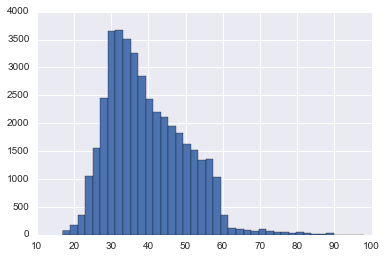

In [16]:
df['age'].hist(bins=40)

с возрастра 60 лет кол-во клиентов резко падает, создадим новую фичу "больше ли 60 лет"

In [17]:
df['is_age_more_60'] = df.age > 60
df['is_age_more_60'] = df['is_age_more_60'].astype('int32')

2.567592502670681

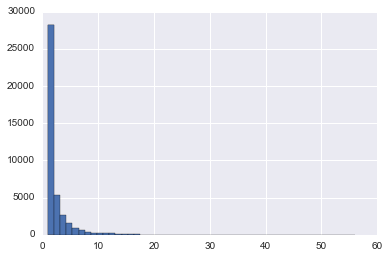

In [18]:
df['campaign'].hist(bins=50)
df['campaign'].mean()

По аналогии с возрастом мы видим, что кол-во компаний резко падает с 2 шт. Создадим еще одну фичу:

In [20]:
df['is_campaign_more_2'] = df.campaign > 2
df['is_campaign_more_2'] = df['is_campaign_more_2'].astype('int32')

In [21]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

больше всего клиентов, с которыми не контактировали (значение == 999). Снова добавим новую фичу

In [22]:
df['is_pdays_more_999'] = df.pdays == 999
df['is_pdays_more_999'] = df['is_pdays_more_999'].astype('int32')

Логично, что в зависимости от уровня образования и области работы люди по разному берут депозит. Если мы не знаем оба эти параметра? Для таких клиентов сложно спрогнозировать реакцию на target, поэтому их также выделим в отдельную категорию

In [23]:
df['no_info_edu_job'] = (df.education == 'unknown') & (df.job == 'unknown')
df['no_info_edu_job'] = df['no_info_edu_job'].astype('int32')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 16475
Data columns (total 27 columns):
_id                   41188 non-null object
age                   41188 non-null int64
campaign              41188 non-null int64
cons.conf.idx         41188 non-null float64
cons.price.idx        41188 non-null float64
contact               41188 non-null object
day_of_week           41188 non-null object
default               41188 non-null object
duration              41188 non-null int64
education             41188 non-null object
emp.var.rate          41188 non-null float64
euribor3m             41188 non-null float64
housing               41188 non-null object
job                   41188 non-null object
loan                  41188 non-null object
marital               41188 non-null object
month                 41188 non-null object
nr.employed           41188 non-null float64
pdays                 41188 non-null int64
poutcome              41188 non-null object
previous  

Преобразуем категориальные данные

In [25]:
def data_preproc(df_input):
    if '_id'in df_input.columns:
        df_input.drop(['_id'], axis=1, inplace=True)
    
    cat_cols = [n for n in df_input.columns if df_input[n].dtype=='object']
    
    dummies = pd.get_dummies(df_input[cat_cols])
    
    df_input = pd.concat([df_input, dummies], axis=1)
    df_input.drop(cat_cols, axis=1, inplace=True)
    
    return df_input

### Выбор модели и прогноз

In [26]:
df_train_resample = df[df.source == 'train']
df_train_resample.drop('source', axis=1, inplace=True)
df_train_resample = data_preproc(df_train_resample)
df_train_resample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24712 entries, 0 to 24711
Data columns (total 68 columns):
age                              24712 non-null int64
campaign                         24712 non-null int64
cons.conf.idx                    24712 non-null float64
cons.price.idx                   24712 non-null float64
duration                         24712 non-null int64
emp.var.rate                     24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
pdays                            24712 non-null int64
previous                         24712 non-null int64
target                           24712 non-null float64
is_age_more_60                   24712 non-null int32
is_campaign_more_2               24712 non-null int32
is_pdays_more_999                24712 non-null int32
no_info_edu_job                  24712 non-null int32
contact_cellular                 24712 non-null uint8
contact_telepho

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


def calculate(model, X, y):
    kfold = KFold(n_splits=12, shuffle=True, random_state=0)
    roc_auc_mean = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold)

    return roc_auc_mean.mean()

X = df_train_resample.drop('target', axis=1)
y = df_train_resample.target

In [34]:
knn = KNeighborsClassifier(n_neighbors=60)
knn_roc_auc = calculate(knn, X, y)

RF = RandomForestClassifier(n_estimators=60, random_state=1)
RF_roc_auc = calculate(RF, X, y)

LR = LinearRegression()
LR_roc_auc = calculate(LR, X, y)

print('knn roc_auc_score:\t{}'.format(knn_roc_auc))
print('RF roc_auc_score:\t{}'.format(RF_roc_auc))
print('LR roc_auc_score:\t{}'.format(LR_roc_auc))

knn roc_auc_score:	0.9286357339469841
RF roc_auc_score:	0.938149608246566
LR roc_auc_score:	0.9323220852041576


По критерию roc_auc лучше всего себя показал случайный лес. Предскажем значения для тестовой выборки

т.к. у нас разное кол-во 1 и 0 в target нам нужно вычислить оптимальный threshold 

In [40]:
X = df_train_resample.drop('target', axis=1)
y = df_train_resample.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

RF = RandomForestClassifier(n_estimators=500, random_state=1) # возьмем большее кол-во деревьев для более точного threshold
RF.fit(X_train, y_train)

predict = RF.predict(X_test)
predict_proba = RF.predict_proba(X_test)

p, r, t = precision_recall_curve(y_test, predict_proba[:,1])

F1 = 2 * (p * r) / (p + r)
thresholds_table = pd.DataFrame([x for x in zip(F1, t)], columns=['f1', 't']).sort_values(by='f1', ascending=False)
con = ((thresholds_table.f1) == thresholds_table.f1.max()) | (thresholds_table.t == .5)
thresholds_table[con]

,f1,t
182,0.633126,0.364
250,0.551020,0.500


Для стандартного threshold в 0.5 f1 мера составляет 0,55. Нам же нужно максимальная f1 мера, поэтому возьмем threshold ==  	0,364. Далее делаем предсказание для тестовой выборки

In [46]:
df_test_resample = df[df.source=='test']
df_test_resample.drop(['source', 'target'], axis=1, inplace=True)
df_test_resample = data_preproc(df_test_resample)

predict_proba_test = RF.predict_proba(df_test_resample)[:, 1] > 0.364
df_test['target'] = predict_proba_test
df_test['target'] = df_test['target'].astype('int32')

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Подготовим данные для kaggle

In [53]:
df_test_kaggle = df_test[['_id', 'target']]
df_test_kaggle.index = df_test_kaggle['_id']
df_test_kaggle.drop('_id', axis=1, inplace=True)
df_test_kaggle.to_csv('data/sample_submission.csv', sep=',')

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
